In [8]:
%matplotlib inline
import numpy as np
import pandas as pd
import re as re
import sklearn
import seaborn as sns
import matplotlib as plt
import os
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import os.path
import csv
import math
import matplotlib.pyplot as plt
import matplotlib
import matplotlib.dates as mdates
from scipy import stats
plt.style.use('ggplot') 
font = {'family' : 'AppleGothic'}
matplotlib.rc('font', **font)
matplotlib.rcParams['figure.figsize'] = (19.2, 10.8)
#matplotlib.rcParams['figure.figsize'] = (10,10)

#plt.rcParams['font.family'] = 'Times New Roman' #全体のフォントを設定
plt.rcParams['font.family'] = 'IPAPGothic'
plt.rcParams['font.size'] = 26 #フォントサイズを設定
plt.rcParams['axes.linewidth'] = 1.5 #軸の太さを設定。目盛りは変わらない


activity = ["eat", 'wipe', 'type', 'write', 'fold', 'peg']


In [9]:
df = pd.read_csv(os.path.join(os.getcwd(),'data/task_table.csv'), delim_whitespace=False)
df

,Task,Angle,Acceleration,Subject
0,eat,3799.100135,3147.482460,1
1,wipe,7330.513663,23807.499260,1
2,type,3412.228866,7601.213170,1
3,write,8036.648078,4727.532735,1
4,fold,17544.984280,16363.654130,1
5,peg,25097.180040,15754.965690,1
6,eat,2829.078040,5167.101301,2
7,wipe,899.665578,6710.688226,2
8,type,2825.275456,5939.070548,2
9,write,241.269559,6564.249648,2


In [10]:
df2 = pd.pivot_table(df,
                     index=['Subject'], 
                     columns=['Task'])
df2

Acceleration                                                         \
Task             eat         fold           peg          type          wipe   
Subject                                                                       
1        3147.482460  16363.65413  15754.965690   7601.213170  23807.499260   
2        5167.101301  16417.92670  14841.394510   5939.070548   6710.688226   
3        3644.474787  11071.11086   9995.998122   4711.386534   6672.316353   
4        3849.874404  16324.66329  16691.469240   7599.444264  12760.478340   
5        6121.833482  20576.31245  12841.482250  14766.024590  13348.945250   

                            Angle                                          \
Task           write          eat         fold          peg          type   
Subject                                                                     
1        4727.532735  3799.100135  17544.98428  25097.18004   3412.228866   
2        6564.249648  2829.078040  28396.12371  24970.02475   2825.275456   
3        5538.247938  2551.106924  18637.90945  21200.68139  16314.529490   
4        7502.223003  2388.083701  54135.93907  31405.56927  11766.573050   
5        6942.076258  3312.539097  33080.95934  21300.12506   6786.216135   

                                     
Task             wipe         write  
Subject                              
1         7330.513663   8036.648078  
2          899.665578    241.269559  
3          153.878291   5852.985366  
4         1638.407079  10508.232010  
5        11728.859820   3727.240858

In [59]:
acceleration = df2.Acceleration
angle = df2.Angle

In [60]:
for act in activity:
    print("Acceleration",acceleration[act],"\n\nAngle",angle[act],"\n")

Acceleration Subject
1    3147.482460
2    5167.101301
3    3644.474787
4    3849.874404
5    6121.833482
Name: eat, dtype: float64 

Angle Subject
1    3799.100135
2    2829.078040
3    2551.106924
4    2388.083701
5    3312.539097
Name: eat, dtype: float64 

Acceleration Subject
1    23807.499260
2     6710.688226
3     6672.316353
4    12760.478340
5    13348.945250
Name: wipe, dtype: float64 

Angle Subject
1     7330.513663
2      899.665578
3      153.878291
4     1638.407079
5    11728.859820
Name: wipe, dtype: float64 

Acceleration Subject
1     7601.213170
2     5939.070548
3     4711.386534
4     7599.444264
5    14766.024590
Name: type, dtype: float64 

Angle Subject
1     3412.228866
2     2825.275456
3    16314.529490
4    11766.573050
5     6786.216135
Name: type, dtype: float64 

Acceleration Subject
1    4727.532735
2    6564.249648
3    5538.247938
4    7502.223003
5    6942.076258
Name: write, dtype: float64 

Angle Subject
1     8036.648078
2      241.269559
3     5

In [61]:
df.groupby("Task").describe()

Acceleration                                                         \
             count          mean          std           min           25%   
Task                                                                        
eat            5.0   4386.153287  1224.178602   3147.482460   3644.474787   
fold           5.0  16150.733486  3373.992227  11071.110860  16324.663290   
peg            5.0  14025.061962  2664.719022   9995.998122  12841.482250   
type           5.0   8123.427821  3907.838315   4711.386534   5939.070548   
wipe           5.0  12659.985486  6999.966915   6672.316353   6710.688226   
write          5.0   6254.865916  1114.693234   4727.532735   5538.247938   

                                                Angle               ...   \
                50%           75%           max count          mean ...    
Task                                                                ...    
eat     3849.874404   5167.101301   6121.833482   5.0   2975.981579 ...    
fold   16363.654130  16417.926700  20576.312450   5.0  30359.183170 ...    
peg    14841.394510  15754.965690  16691.469240   5.0  24794.716102 ...    
type    7599.444264   7601.213170  14766.024590   5.0   8220.964599 ...    
wipe   12760.478340  13348.945250  23807.499260   5.0   4350.264886 ...    
write   6564.249648   6942.076258   7502.223003   5.0   5673.275174 ...    

                                  Subject                                     \
                75%           max   count mean       std  min  25%  50%  75%   
Task                                                                           
eat     3312.539097   3799.100135     5.0  3.0  1.581139  1.0  2.0  3.0  4.0   
fold   33080.959340  54135.939070     5.0  3.0  1.581139  1.0  2.0  3.0  4.0   
peg    25097.180040  31405.569270     5.0  3.0  1.581139  1.0  2.0  3.0  4.0   
type   11766.573050  16314.529490     5.0  3.0  1.581139  1.0  2.0  3.0  4.0   
wipe    7330.513663  11728.859820     5.0  3.0  1.581139  1.0  2.0  3.0  4.0   
write   8036.648078  10508.232010     5.0  3.0  1.581139  1.0  2.0  3.0  4.0   

            
       max  
Task        
eat    5.0  
fold   5.0  
peg    5.0  
type   5.0  
wipe   5.0  
write  5.0  

[6 rows x 24 columns]

/Users/takato/.pyenv/versions/anaconda3-5.0.0/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['IPAPGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


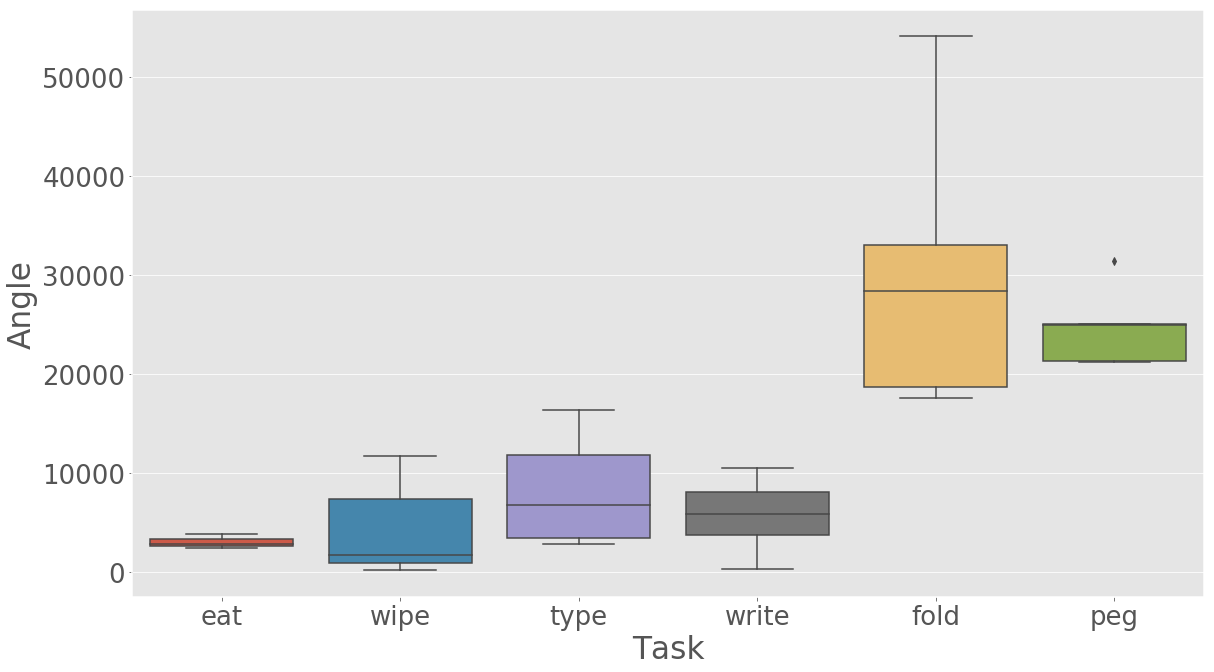

In [62]:
ax = sns.boxplot(x="Task", y="Angle", data=df)

/Users/takato/.pyenv/versions/anaconda3-5.0.0/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['IPAPGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


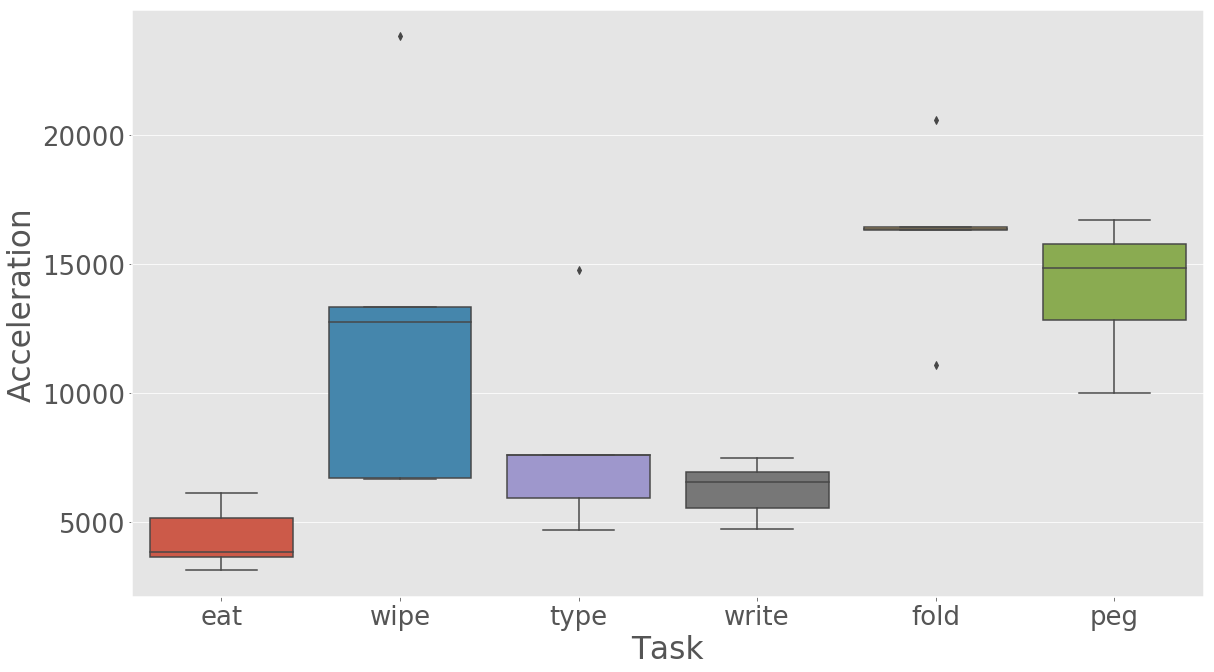

In [63]:
ax = sns.boxplot(x="Task", y="Acceleration", data=df)

In [65]:
#正規性の検定 p=0.05以上で正規分布
for act in activity:
    print(act,":",stats.shapiro(acceleration[act]))


eat : (0.9168605804443359, 0.5098929405212402)
wipe : (0.861049473285675, 0.2320408821105957)
type : (0.821503758430481, 0.11992233991622925)
write : (0.9588159918785095, 0.7997153401374817)
fold : (0.8827463388442993, 0.32194194197654724)
peg : (0.9349819421768188, 0.6307139992713928)


In [66]:
#正規性の検定 p=0.05以上で正規分布
for act in activity:
    print(act,":",stats.shapiro(angle[act]))


eat : (0.9398289918899536, 0.6647294163703918)
wipe : (0.853090226650238, 0.20448526740074158)
type : (0.911076545715332, 0.47408679127693176)
write : (0.992827832698822, 0.9885997772216797)
fold : (0.8804044127464294, 0.3111477494239807)
peg : (0.8596204519271851, 0.22688888013362885)


In [69]:
#等分散の検定 p=0.05以上で等分散
stats.bartlett(acceleration.eat,
               acceleration.wipe,
               acceleration.type,
               acceleration.write,
               acceleration.fold,
               acceleration.peg)

BartlettResult(statistic=15.706655820828962, pvalue=0.007733453386146851)

In [70]:
#等分散の検定 p=0.05以上で等分散
stats.bartlett(angle.eat,
               angle.wipe,
               angle.type,
               angle.write,
               angle.fold,
               angle.peg)

BartlettResult(statistic=25.79376490650617, pvalue=9.784066321685833e-05)

In [71]:
#外れ値の検定
from outliers import smirnov_grubbs as grubbs
for act in activity:
    #両側検定，外れ値以外を出力する
    #print(act,":\n",grubbs.test(df[act], alpha=0.05),"\n")
    
    #片側検定,外れ値を出力する
    print(act,":\n",grubbs.min_test_outliers(acceleration[act], alpha=0.05))
    print(act,":\n",grubbs.max_test_outliers(acceleration[act], alpha=0.05))



eat :
 []
eat :
 []
wipe :
 []
wipe :
 []
type :
 []
type :
 [14766.02459]
write :
 []
write :
 []
fold :
 []
fold :
 []
peg :
 []
peg :
 []


In [72]:
#外れ値の検定
from outliers import smirnov_grubbs as grubbs
for act in activity:
    #両側検定，外れ値以外を出力する
    #print(act,":\n",grubbs.test(df[act], alpha=0.05),"\n")
    
    #片側検定,外れ値を出力する
    print(act,":\n",grubbs.min_test_outliers(angle[act], alpha=0.05))
    print(act,":\n",grubbs.max_test_outliers(angle[act], alpha=0.05))



eat :
 []
eat :
 []
wipe :
 []
wipe :
 []
type :
 []
type :
 []
write :
 []
write :
 []
fold :
 []
fold :
 []
peg :
 []
peg :
 []


In [73]:
#どこかの群に有意差があるかということがわかる
#等分散の時に使える！
#p<0.05で有意差あり
stats.f_oneway(acceleration.eat,
               acceleration.wipe,
               acceleration.type,
               acceleration.write,
               acceleration.fold,
               acceleration.peg)

F_onewayResult(statistic=7.701668401552932, pvalue=0.00019319390113360665)

In [75]:
#どこかの群に有意差があるかということがわかる
#等分散の時に使える！
#p<0.05で有意差あり
stats.f_oneway(angle.eat,
               angle.wipe,
               angle.type,
               angle.write,
               angle.fold,
               angle.peg)

F_onewayResult(statistic=13.35440132953626, pvalue=2.7825125179252535e-06)

In [81]:
angle_list = angle.values.tolist()

In [82]:
angle_list


[[3799.100135,
  17544.98428,
  25097.18004,
  3412.2288659999995,
  7330.513663,
  8036.648078],
 [2829.07804,
  28396.123710000003,
  24970.02475,
  2825.275456,
  899.665578,
  241.269559],
 [2551.1069239999997,
  18637.90945,
  21200.68139,
  16314.52949,
  153.878291,
  5852.985366],
 [2388.083701,
  54135.93907000001,
  31405.56927,
  11766.57305,
  1638.4070789999998,
  10508.23201],
 [3312.539097,
  33080.95934,
  21300.12506,
  6786.216135,
  11728.85982,
  3727.2408579999997]]

In [84]:
from statsmodels.sandbox.stats.multicomp import multipletests
p_adjusted = multipletests(angle.wipe,method='bonferroni')

In [85]:
p_adjusted

(array([False, False, False, False, False]),
 array([1., 1., 1., 1., 1.]),
 0.010206218313011495,
 0.01)